Step 0. 패키지 불러오기

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
import os

In [4]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

Step1. 데이터 구성하기

In [6]:
df = pd.read_csv("data/BigData/체질검사.csv")
df_x=df.drop('FAT',axis=1)
df_y=df['FAT']

# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=23)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


Step2. 모델 생성

In [7]:
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.177
Score on test set : -0.012


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
svm_uncustomized

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

설명력이 매우 낮음 : 데이터 scale 변환 필요

Scale 변환(설명변수 대상)

In [9]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712


Scale 변환 데이터 분할

In [20]:
df_scaled_train_x ,df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=23)
print("train data X size :{}".format(df_scaled_train_x.shape))
print("test data X size :{}".format(df_scaled_test_x.shape))

train data X size :(176, 13)
test data X size :(76, 13)


기본 옵션으로 모델 생성 : scaled 데이터 사용

In [22]:
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Score on training set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on training set : 0.573
Score on test set : 0.514


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


모델 설명력이 개선되었으나 parameter 조정 필요

In [23]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Step2. 모델 parameter 조정

### C 규제 변경

In [ ]:
train_score=[]; test_score=[]; sub_score=[]

para_C = [10 ** c for c in range(-2, 3)]

for v_C in para_C:
    svm = SVR(C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_c=pd.DataFrame()
df_score_c['gamma']=para_C
df_score_c['TrainScore']=train_score
df_score_c['TestScore']=test_score
df_score_c['sub']=sub_score

df_score_c.round(3)

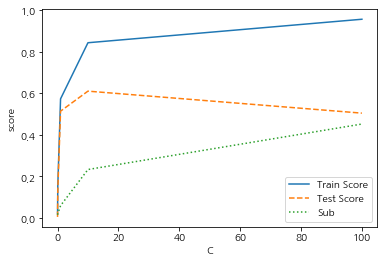

In [41]:
plt.plot(para_C, train_score, linestyle="-", label="Train Score")
plt.plot(para_C, test_score, lineStyle="--", label="Test Score")
plt.plot(para_C,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('C')
plt.legend()

### Gamma 규제(훈련 샘플이 미치는 영향의 범위) 변경

In [61]:
train_score=[]; test_score=[]; sub_score=[]
para_gamma = [10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm=SVR(gamma=v_gamma,C=10)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_gamma=pd.DataFrame()
df_score_gamma['gamma']=para_gamma
df_score_gamma['TrainScore']=train_score
df_score_gamma['TestScore']=test_score
df_score_gamma['sub']=sub_score

df_score_gamma.round(3)

,gamma,TrainScore,TestScore,sub
0,0.01,0.753,0.637,0.116
1,0.10,0.862,0.591,0.270
2,1.00,0.936,0.201,0.735
3,10.00,0.918,-0.022,0.941
4,100.00,0.918,-0.022,0.941


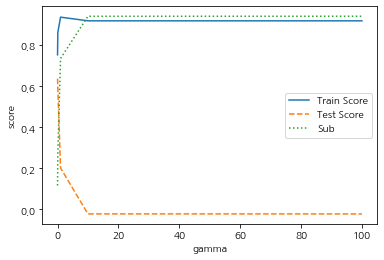

In [62]:
plt.plot(para_gamma, train_score, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_score, lineStyle="--", label="Test Score")
plt.plot(para_gamma,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('gamma')
plt.legend()

In [63]:
train_score=[]; test_score=[]; sub_score=[]
para_gamma = [0.01*gamma for gamma in range(1,9)]

for v_gamma in para_gamma:
    svm=SVR(gamma=v_gamma,C=10)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_gamma=pd.DataFrame()
df_score_gamma['gamma']=para_gamma
df_score_gamma['TrainScore']=train_score
df_score_gamma['TestScore']=test_score
df_score_gamma['sub']=sub_score

df_score_gamma.round(3)

,gamma,TrainScore,TestScore,sub
0,0.01,0.753,0.637,0.116
1,0.02,0.779,0.624,0.155
2,0.03,0.791,0.619,0.172
3,0.04,0.804,0.620,0.184
4,0.05,0.816,0.622,0.194
5,0.06,0.827,0.620,0.207
6,0.07,0.837,0.616,0.221
7,0.08,0.845,0.605,0.240


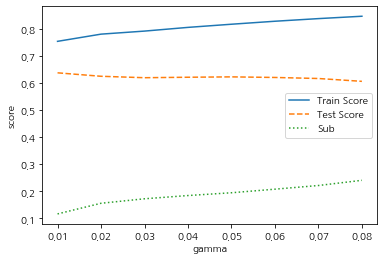

In [64]:
plt.plot(para_gamma, train_score, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_score, lineStyle="--", label="Test Score")
plt.plot(para_gamma,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('gamma')
plt.legend()

### Epsilon 변경

In [65]:
train_score=[]; test_score=[]; sub_score=[]

para_epsilon=[eps/20 for eps in range(1,21)]

for v_epsilon in para_epsilon:
    svm=SVR(epsilon=v_epsilon, C=10, gamma=0.01)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))

df_score_epsilon=pd.DataFrame()
df_score_epsilon['epsilon']=para_epsilon
df_score_epsilon['TrainScore']=train_score
df_score_epsilon['TestScore']=test_score
df_score_epsilon['sub']=sub_score

df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore,sub
0,0.05,0.754,0.637,0.117
1,0.10,0.753,0.637,0.116
2,0.15,0.752,0.636,0.117
3,0.20,0.752,0.634,0.118
4,0.25,0.752,0.633,0.119
5,0.30,0.752,0.633,0.119
6,0.35,0.753,0.633,0.119
7,0.40,0.754,0.633,0.120
8,0.45,0.755,0.633,0.122
9,0.50,0.756,0.632,0.124


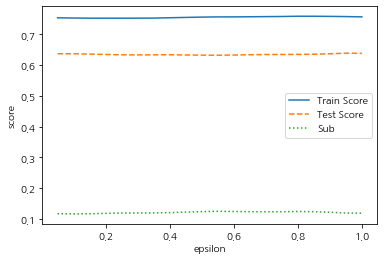

In [66]:
plt.plot(para_epsilon, train_score, linestyle="-", label="Train Score")
plt.plot(para_epsilon, test_score, lineStyle="--", label="Test Score")
plt.plot(para_epsilon,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('epsilon')
plt.legend()

### 최종 모델 생성

In [68]:
svm_final=SVR(C=10, gamma=0.1, epsilon=0.5)
svm_final.fit(df_scaled_train_x, df_train_y)

print("Scored on training set: {:.3f}".format(svm_final.score(df_scaled_train_x, df_train_y)))
print("Scored on test set : {:.3f}".format(svm_final.score(df_scaled_test_x, df_test_y)))

Scored on training set: 0.864
Scored on test set : 0.611


In [ ]:
estimator = SVR()

param_grid={"C":para_C, "gamma":para_gamma, "epsilon":para_epsilon}


# 실습

In [80]:
df= pd.read_csv("data/BigData/DIABETES.csv")
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [81]:
df_x=df.drop('Y',axis=1)
df_y=df['Y']

# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=55)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(309, 10)
train data Y size :(309,)
test data X size :(133, 10)
test data Y size :(133,)


Step2. 모델 생성

In [82]:
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.002
Score on test set : -0.002


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
svm_uncustomized

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

설명력이 매우 낮음 : 데이터 scale 변환 필요

Scale 변환(설명변수 대상)

In [84]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


Scale 변환 데이터 분할

In [85]:
df_scaled_train_x ,df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=23)
print("train data X size :{}".format(df_scaled_train_x.shape))
print("test data X size :{}".format(df_scaled_test_x.shape))

train data X size :(309, 10)
test data X size :(133, 10)


기본 옵션으로 모델 생성 : scaled 데이터 사용

In [86]:
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Score on training set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on training set : 0.157
Score on test set : 0.175


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


모델 설명력이 개선되었으나 parameter 조정 필요

In [87]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Step2. 모델 parameter 조정

### C 규제

In [88]:
train_score=[]; test_score=[]; sub_score=[]

para_C = [10 ** c for c in range(-2, 3)]

for v_C in para_C:
    svm = SVR(C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_c=pd.DataFrame()
df_score_c['gamma']=para_C
df_score_c['TrainScore']=train_score
df_score_c['TestScore']=test_score
df_score_c['sub']=sub_score

df_score_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,gamma,TrainScore,TestScore,sub
0,0.01,-0.016,0.000,0.016
1,0.10,0.003,0.021,0.017
2,1.00,0.157,0.175,0.019
3,10.00,0.531,0.507,0.024
4,100.00,0.671,0.505,0.167


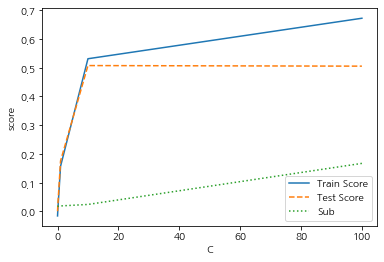

In [89]:
plt.plot(para_C, train_score, linestyle="-", label="Train Score")
plt.plot(para_C, test_score, lineStyle="--", label="Test Score")
plt.plot(para_C,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('C')
plt.legend()

0 ~ 20 사이를 다시 확인해봄

In [134]:
train_score=[]; test_score=[]; sub_score=[]

para_C = [c for c in range(1,20,2)]

for v_C in para_C:
    svm = SVR(C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_c=pd.DataFrame()
df_score_c['gamma']=para_C
df_score_c['TrainScore']=train_score
df_score_c['TestScore']=test_score
df_score_c['sub']=sub_score

df_score_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,gamma,TrainScore,TestScore,sub
0,1,0.157,0.175,0.019
1,3,0.350,0.362,0.012
2,5,0.444,0.441,0.004
3,7,0.492,0.483,0.009
4,9,0.522,0.502,0.019
5,11,0.538,0.511,0.026
6,13,0.547,0.516,0.031
7,15,0.555,0.519,0.036
8,17,0.562,0.521,0.041
9,19,0.568,0.522,0.046


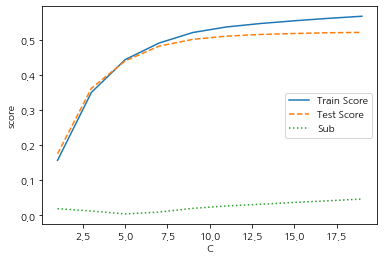

In [135]:
plt.plot(para_C, train_score, linestyle="-", label="Train Score")
plt.plot(para_C, test_score, lineStyle="--", label="Test Score")
plt.plot(para_C,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('C')
plt.legend()

c=19 선택

### Gamma 규제(훈련 샘플이 미치는 영향의 범위) 변경

In [95]:
train_score=[]; test_score=[]; sub_score=[]
para_gamma = [10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm=SVR(gamma=v_gamma,C=7)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_gamma=pd.DataFrame()
df_score_gamma['gamma']=para_gamma
df_score_gamma['TrainScore']=train_score
df_score_gamma['TestScore']=test_score
df_score_gamma['sub']=sub_score

df_score_gamma.round(3)

,gamma,TrainScore,TestScore,sub
0,0.01,0.401,0.442,0.040
1,0.10,0.492,0.483,0.009
2,1.00,0.151,0.034,0.116
3,10.00,0.130,-0.001,0.131
4,100.00,0.130,-0.001,0.131


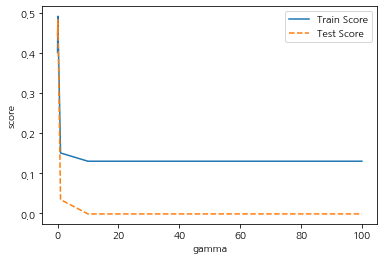

In [97]:
plt.plot(para_gamma, train_score, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_score, lineStyle="--", label="Test Score")
#plt.plot(para_gamma,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('gamma')
plt.legend()

0.01 ~ 0.09 사이의 값을 다시 확인해봄

In [138]:
train_score=[]; test_score=[]; sub_score=[]
para_gamma = [0.01*gamma for gamma in range(1,10)]

for v_gamma in para_gamma:
    svm=SVR(gamma=v_gamma,C=7)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))
    
df_score_gamma=pd.DataFrame()
df_score_gamma['gamma']=para_gamma
df_score_gamma['TrainScore']=train_score
df_score_gamma['TestScore']=test_score
df_score_gamma['sub']=sub_score

df_score_gamma.round(3)

,gamma,TrainScore,TestScore,sub
0,0.01,0.401,0.442,0.040
1,0.02,0.450,0.488,0.039
2,0.03,0.471,0.503,0.032
3,0.04,0.488,0.508,0.020
4,0.05,0.497,0.508,0.011
5,0.06,0.501,0.506,0.005
6,0.07,0.502,0.503,0.001
7,0.08,0.501,0.498,0.003
8,0.09,0.497,0.492,0.005


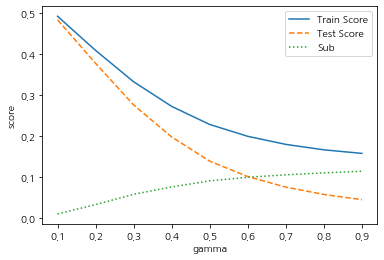

In [137]:
plt.plot(para_gamma, train_score, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_score, lineStyle="--", label="Test Score")
plt.plot(para_gamma,sub_score, lineStyle=":", label="Sub" )
plt.ylabel('score'); plt.xlabel('gamma')
plt.legend()

gamma=0.07

### Epsilon 변경

In [117]:
train_score=[]; test_score=[]; sub_score=[]

para_epsilon=[eps/20 for eps in range(1,21)]

for v_epsilon in para_epsilon:
    svm=SVR(epsilon=v_epsilon, C=7, gamma=0.07)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))

df_score_epsilon=pd.DataFrame()
df_score_epsilon['epsilon']=para_epsilon
df_score_epsilon['TrainScore']=train_score
df_score_epsilon['TestScore']=test_score
df_score_epsilon['sub']=sub_score

df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore,sub
0,0.05,0.502,0.503,0.001
1,0.10,0.502,0.503,0.001
2,0.15,0.502,0.503,0.001
3,0.20,0.502,0.503,0.001
4,0.25,0.502,0.503,0.001
5,0.30,0.502,0.503,0.001
6,0.35,0.502,0.503,0.001
7,0.40,0.502,0.503,0.001
8,0.45,0.501,0.503,0.001
9,0.50,0.501,0.503,0.001


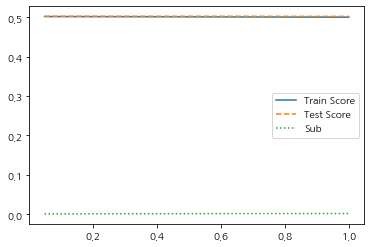

In [118]:
plt.plot(para_epsilon, train_score, linestyle="-", label="Train Score")
plt.plot(para_epsilon, test_score, lineStyle="--", label="Test Score")
plt.plot(para_epsilon,sub_score, lineStyle=":", label="Sub" )
#plt.ylabel('score'); plt.xlabel('epsilon')
plt.legend()

In [115]:
train_score=[]; test_score=[]; sub_score=[]

para_epsilon=[eps for eps in range(0,100,5)]

for v_epsilon in para_epsilon:
    svm=SVR(epsilon=v_epsilon, C=7, gamma=0.07)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    sub_score.append(abs(svm.score(df_scaled_train_x,df_train_y)-svm.score(df_scaled_test_x, df_test_y)))

df_score_epsilon=pd.DataFrame()
df_score_epsilon['epsilon']=para_epsilon
df_score_epsilon['TrainScore']=train_score
df_score_epsilon['TestScore']=test_score
df_score_epsilon['sub']=sub_score

df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore,sub
0,0,0.502,0.503,0.001
1,5,0.503,0.504,0.001
2,10,0.501,0.502,0.000
3,15,0.493,0.496,0.002
4,20,0.487,0.490,0.003
5,25,0.476,0.477,0.001
6,30,0.468,0.469,0.001
7,35,0.462,0.462,0.000
8,40,0.453,0.450,0.002
9,45,0.443,0.438,0.005


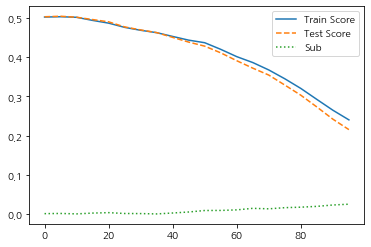

In [116]:
plt.plot(para_epsilon, train_score, linestyle="-", label="Train Score")
plt.plot(para_epsilon, test_score, lineStyle="--", label="Test Score")
plt.plot(para_epsilon,sub_score, lineStyle=":", label="Sub" )
#plt.ylabel('score'); plt.xlabel('epsilon')
plt.legend()

### 최종 모델 생성

In [126]:
svm_final=SVR(C=19, gamma=0.07, epsilon=5)
svm_final.fit(df_scaled_train_x, df_train_y)

print("Scored on training set: {:.3f}".format(svm_final.score(df_scaled_train_x, df_train_y)))
print("Scored on test set : {:.3f}".format(svm_final.score(df_scaled_test_x, df_test_y)))

Scored on training set: 0.555
Scored on test set : 0.527
